In this assignment, you will implement ridge regression via gradient descent. You will:



In [10]:
import pandas as pd
import numpy as np

# Data

In [11]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [20]:
sales=pd.read_csv('kc_house_data.csv')
train=pd.read_csv('kc_house_train_data.csv')
test=pd.read_csv('kc_house_test_data.csv')

# useful functions

In [21]:
def get_data(data_frame, features, output):
    '''args: 
    data_frame= array, dataframe alike
    features: list-like []
    output: str'''
    
    data_frame["constant"]=1
    features= ["constant"] + features
    
    features_frame= data_frame[features]
    feature_matrix= np.array(features_frame)
    
    output_array = np.array(data_frame[output])
    return(feature_matrix, output_array)

In [22]:
def predict_output(feature_matrix, weights):
    
    predictions = np.dot(feature_matrix, weights)
    return predictions

In [23]:
def feature_derivative_ridge(errors, feature, weights, l2_penalty, feature_is_constant):
    d_error = 2*np.dot(errors, feature)
    d_l2    = 2*np.dot(l2_penalty, weights)
    if feature_is_constant == True:
        derivative = d_error
    else:
        derivative = d_error + d_l2
    
    return derivative

In [24]:
#test feature_derivative_ridge

(example_features, example_output) = get_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(np.sum(errors*example_features[:,1])*2+20.)
print('')

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2.)

-56554166815950.0
-56554166815950.0

-22446749330.0
-22446749330.0


In [70]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    
    weights = np.array(initial_weights, dtype=object)
    
    while max_iterations >0:
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output
        
        for i in range(len(weights)):
            if i == 0:
                feature_is_constant = True
            else:
                feature_is_constant = False
        
            derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, feature_is_constant)
            weights[i] = weights[i] - (step_size*derivative)
        
        max_iterations -= 1
    return weights

# simple test


In [71]:

simple_features = ['sqft_living']
my_output = 'price'

(simple_feature_matrix, output) = get_data(train, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_data(test, simple_features, my_output)

## no L2

In [72]:

step_size=1e-12
max_iterations = 1000
initial_weights = np.array([0.,0.])
simple_weights_0_penalty=ridge_regression_gradient_descent(simple_feature_matrix,
                                                          output, initial_weights,
                                                          step_size, 0.0, max_iterations)


### Q1 What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?

In [79]:
simple_weights_0_penalty

array([-0.16311351478746433, 263.0243689653849], dtype=object)

## high regularization L2

In [73]:
simple_weights_high_penalty=ridge_regression_gradient_descent(simple_feature_matrix,
                                                          output, initial_weights,
                                                          step_size, 1e11, max_iterations)


### Q2 What is the value of the coefficient for sqft_living that you learned with high regularization (l2_penalty=1e11)? Use American-style decimals (e.g. 30.5) and round your answer to 1 decimal place.

In [81]:
simple_weights_high_penalty

array([9.767303822265427, 124.57217567413912], dtype=object)

### Q3 Quiz Question: Comparing the lines you fit with the with no regularization versus high regularization, which one is steeper?

<IPython.core.display.Javascript object>


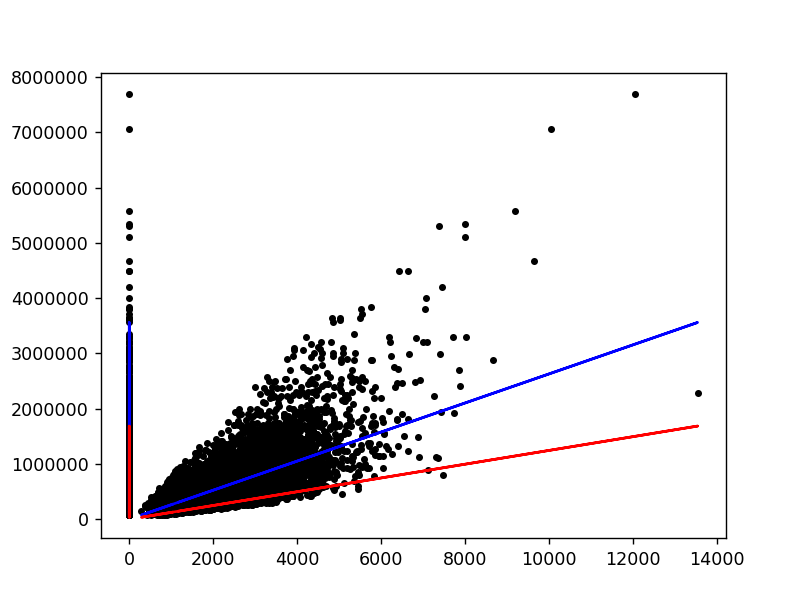

In [78]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

# compute RSS on test data

## Q4: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?

In [83]:
# weights all zero

initial_pred=predict_output(simple_test_feature_matrix, inital_weights)
initial_rss = ((test_output - initial_pred)**2).sum()
print('{:.2e}'.format(initial_rss))

1.78e+15


In [84]:
# no l2 weights

L2_0_pred= predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
L2_0_RSS = ((test_output - L2_0_pred)**2).sum()
print('{:.2e}'.format(L2_0_RSS))

2.76e+14


In [86]:
# high L2

L2_high_pred= predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
L2_high_RSS = ((test_output - L2_high_pred)**2).sum()
print('{:.2e}'.format(L2_high_RSS))

6.95e+14


# Ridge regression on 2 features

In [90]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_data(train, model_features, my_output)
(test_feature_matrix, test_output) = get_data(test, model_features, my_output)

## Q5, Q6  What is the value of the coefficient for ‘sqft_living’ that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?

## No L2

In [102]:
step_size=1e-12
max_iterations = 1000
initial_weights = np.array([0.,0.,0.])

In [103]:
multiple_weights_0_penalty=ridge_regression_gradient_descent(feature_matrix,
                                                          output, initial_weights,
                                                          step_size, 0.0, max_iterations)

In [104]:
multiple_weights_0_penalty

array([-0.35743482903403373, 243.05416982095642, 22.414814971402635],
      dtype=object)

## HIgh L2

In [110]:
multiple_weights_high_penalty=ridge_regression_gradient_descent(feature_matrix,
                                                          output, initial_weights,
                                                          step_size, 1e11, max_iterations)

In [111]:
multiple_weights_high_penalty

array([6.74296578942628, 91.48927364712398, 78.4365876633503],
      dtype=object)

# Compute RSS 

## Q6  What are the RSS on the test data for each of the set of weights above  no regularization)?

In [108]:
mult_L2_0_pred=predict_output(test_feature_matrix, multiple_weights_0_penalty)
mult_L2_0_rss = ((test_output - mult_L2_0_pred)**2).sum()
print('{:.2e}'.format(mult_L2_0_rss))

2.74e+14


In [113]:
mult_L2_high_pred=predict_output(test_feature_matrix, multiple_weights_high_penalty)
mult_L2_high_rss = ((test_output - mult_L2_high_pred)**2).sum()
print('{:.2e}'.format(mult_L2_high_rss))

5.00e+14


# predict house price for 1st house uwing no reg and hgh reg models

In [116]:
print('prediction using NO regularization')
print('the predicted price for the house is: {:.2f}'.format(mult_L2_0_pred[0]))
print('the deviation from actual price is: {:.2f}'.format( test_output[0] - mult_L2_0_pred[0]))

prediction using NO regularization
the predicted price for the house is: 387465.48
the deviation from actual price is: -77465.48


In [117]:
print('prediction using HIGH regularization')
print('the predicted price for the house is: {:.2f}'.format(mult_L2_high_pred[0]))
print('the deviation from actual price is: {:.2f}'.format( test_output[0] - mult_L2_high_pred[0]))

prediction using HIGH regularization
the predicted price for the house is: 270453.53
the deviation from actual price is: 39546.47
